## Problem 1 - Equation of State of a Relativistic Monatomic Ideal Gas
The energy of a relativistic particle is given by
$$
\epsilon^2 = p^2 c^2 + m^2 c^4 \implies \epsilon = c \sqrt{ p^2 + (mc)^2}.
$$

The partition function $Z$ is then given by
$$
    \begin{align*}
        Z
        & = \sum_{\text{states}} e^{- \beta \epsilon_q} \\
        & = \frac{1}{h^3} \int e^{- \beta \epsilon_q} \mathrm{d}^3 x \mathrm{d}^3 p \\
        & = \frac{1}{h^3} \int e^{- \beta c \sqrt{ p^2 + (mc)^2}} \mathrm{d}^3 x \mathrm{d}^3 p \\
        & = \frac{L^3}{h^3} \int e^{- \beta c \sqrt{ p^2 + (mc)^2}} \mathrm{d}^3 p \\
        & = \frac{4 \pi L^3}{h^3} \int p^2 e^{- \beta c \sqrt{ p^2 + (mc)^2}} \mathrm{d} p \\
    \end{align*}
$$

We will use units where $c = h = k_B = m_p = 1$. Finally, we will assume a box of length $L = 1 \, \mathrm{m}$.

In [171]:
import numpy as np
import scipy.integrate as int
import matplotlib.pyplot as plt

##### CONSTANTS #####
h = 1           # Planck's constant (GeV/Hz)
c = 1           # Speed of light (in natural units)
k_B = 1         # Boltzmann constant (GeV/K)
m_p = 1         # Proton mass (GeV/c^2)
L = 1           # Length of the box (m)

We will vary the temperature $T$ from $0 \, \mathrm{K}$ to $5 \, \mathrm{K}$.

In [172]:
T = np.linspace(0.001, 5, 1000)
beta = 1 / (k_B * T)

We will now integrate this numerically since this is a tough integral to calculate in a closed form (even for symbolic calculators). We will use the function `quad` from the module `scipy.integrate` to integrate what we need.

In [112]:
def relativisticPartitionFunction(b):
    integrand = int.quad(lambda p: p**2 * (np.exp(- b * c * np.sqrt(p**2 + (m_p*c)**2))), 0, np.inf)[0]
    return (4*np.pi*L**3)/h**3 * integrand

Z = []
for b in beta:
    z = relativisticPartitionFunction(b)
    Z.append(z)

E = - np.diff(np.log(Z)) / np.diff(beta)

C:\Users\Razz\AppData\Local\Temp\ipykernel_7488\2357859190.py:10: RuntimeWarning: divide by zero encountered in log
  E = - np.diff(np.log(Z)) / np.diff(beta)


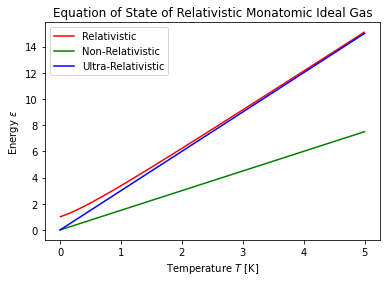

In [113]:
plt.plot(T[:-1], E, 'r', label='Relativistic')
plt.plot(T, (3*k_B*T)/2, 'g', label='Non-Relativistic')
plt.plot(T, 3*k_B*T, 'b', label='Ultra-Relativistic')
# plt.plot(T[:-1], E_discrete, 'k', label='Discrete')
plt.legend(['Relativistic', 'Non-Relativistic', 'Ultra-Relativistic', 'Discrete'])
plt.xlabel('Temperature $T$ [K]')
plt.ylabel('Energy $\epsilon$')
plt.title('Equation of State of Relativistic Monatomic Ideal Gas')
plt.show()

To get the heat capacity (at fixed volume), we just take the derivative of the energy $E(T)$ with respect to the temperature $T$. We expect the transition point from non-relativistic to ultra-relativistic to be at the temperature $T$ when $k_B T = m c^2 \implies T = 1 \, \mathrm{K}$.

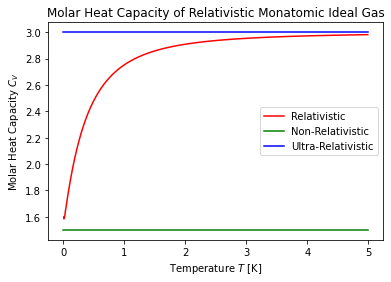

In [114]:
C_V = np.diff(E) / np.diff(T[:-1])

plt.plot(T[:-2], C_V, 'r', label='Relativistic')
plt.plot(T[:-2], 1.5*np.ones(len(C_V)), 'g', label='Non-Relativistic')
plt.plot(T[:-2], 3*np.ones(len(C_V)), 'b', label='Ultra-Relativistic')
plt.legend(['Relativistic', 'Non-Relativistic', 'Ultra-Relativistic', 'Discrete'])
plt.xlabel('Temperature $T$ [K]')
plt.ylabel('Molar Heat Capacity $C_V$')
plt.title('Molar Heat Capacity of Relativistic Monatomic Ideal Gas')
plt.show()

## Problem 2 - Equation of State of a Non-relativistic Diatomic Ideal Gas

In this problem, we are supposed to find the energy and molar heat capacity each as a function of time. We are given the energy $E$ of a diatomic particle is given by
$$
    E(p, j) = \frac{p^2}{2m} + \frac{\hbar^2}{2I} j(j+1).
$$

Additionally, we are also given that the partition function $Z$ is given by
$$
    Z = \frac{1}{h^3} \int \sum_{j = 0}^{\infty} \sum_{m = -j}^{j} e^{-\beta E(p, j)} \mathrm{d}^3 x \mathrm{d}^3 p.
$$

As mentioned in the problem statement, there are $2j + 1$ possible $m$ eigenstates for every $j$. Thus, all different $m$ are $(2j + 1)$-degenerate. This gives us
$$
    \begin{align*}
        Z
        & = \frac{1}{h^3} \int \sum_{j = 0}^{\infty} (2j + 1) e^{-\beta E(p, j)} \mathrm{d}^3 x \mathrm{d}^3 p \\
        & = \frac{V}{h^3} \int \sum_{j = 0}^{\infty} (2j + 1) e^{-\beta \left( \frac{p^2}{2m} + \frac{\hbar^2}{2I} j(j+1) \right)} \mathrm{d}^3 p \\
        & = \frac{V}{h^3} \sum_{j = 0}^{\infty} (2j + 1) e^{-\beta \frac{\hbar^2}{2I} j(j+1)} \int \mathrm{e}^{- \beta \frac{p^2}{2m}} \mathrm{d}^3 p \\
        & = \frac{V}{h^3} \left( \frac{2 \pi m}{\beta} \right)^{\frac{3}{2}} \sum_{j = 0}^{\infty} (2j + 1) e^{-\beta \frac{\hbar^2}{2I} j(j+1)}.
        \end{align*}
$$

The moment of inerta $I$ of a diatomic molecule is given by $I = m_1 r_1^2 + m_2 r_2^2 = \mu R^2$. Since our molecule is diatomic in atoms of the same kind, then we can assume that $m_1 = m_2 = m_p$. Additionally, they are both equidistant from their center of mass, so

In [222]:
T = np.linspace(0.02, 5, 1000)
beta = 1 / (k_B * T)

m_1 = m_p
m_2 = m_p
mu = (m_1*m_2)/(m_1 + m_2)

r = 0.1

I = mu * r**2

In [223]:
def monatomicPartitionFunction(b):
    coefficient = (L**3)/(h**3) * ((2 * np.pi * m_p) / b)**(3/2)
    summation = 0
    for j in range(0, 1000):
        summation += (2*j + 1) * np.exp(-b * (h/(2*np.pi))**2 * 1/(2*I) * j * (j + 1))

    return coefficient * summation

Z = []
for b in beta:
    z = monatomicPartitionFunction(b)
    Z.append(z)


Computing the energy $E$, we have

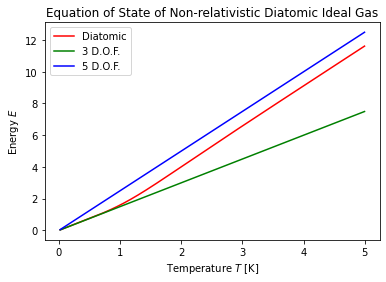

In [224]:
E = - np.diff(np.log(Z)) / np.diff(beta)

plt.plot(T[:-1], E, 'r', label='Diatomic')
plt.plot(T[:-1], 1.5*k_B*T[:-1], 'g', label='3 dof')
plt.plot(T[:-1], 2.5*k_B*T[:-1], 'b', label='5 dof')
plt.legend(['Diatomic', '3 D.O.F.', '5 D.O.F.'])
plt.xlabel('Temperature $T$ [K]')
plt.ylabel('Energy $E$')
plt.title('Equation of State of Non-relativistic Diatomic Ideal Gas')
plt.show()

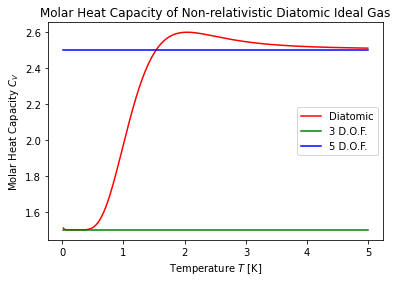

In [225]:
C_V = np.diff(E) / np.diff(T[:-1])

plt.plot(T[:-2], C_V, 'r', label='Diatomic')
plt.plot(T[:-2], 1.5*np.ones(len(T[:-2])), 'g', label='3 dof')
plt.plot(T[:-2], 2.5*np.ones(len(T[:-2])), 'b', label='5 dof')
plt.legend(['Diatomic', '3 D.O.F.', '5 D.O.F.'])
plt.xlabel('Temperature $T$ [K]')
plt.ylabel('Molar Heat Capacity $C_V$')
plt.title('Molar Heat Capacity of Non-relativistic Diatomic Ideal Gas')
plt.show()

## Problem 3 - Heat Capacity of a Two-State System

The partition function of a two-state system with energy separation of $\Delta E$ is given by
$$
    Z = 1 + \mathrm{e}^{- \beta \Delta E}.
$$

The energy $E$ is then
$$
    \begin{align*}
        E
        & = - \frac{\partial \ln(Z)}{\partial \beta} \\
        & = - \frac{- \Delta E \mathrm{e}^{- \beta \Delta E}}{1 + \mathrm{e}^{- \beta \Delta E}} \\
        & = \frac{\Delta E \mathrm{e}^{- \beta \Delta E}}{1 + \mathrm{e}^{- \beta \Delta E}} \\
        & = \frac{\Delta E}{\mathrm{e}^{\beta \Delta E} + 1}.
    \end{align*}
$$

The molar heat capacity is then
$$
    \begin{align*}
        C_V
        & = \left( \frac{\partial E}{\partial T} \right)_V \\
        & = \frac{\partial E}{\partial \beta} \frac{\partial \beta}{\partial T} \\
        & = \frac{\partial }{\partial \beta} \left[ \frac{\Delta E}{\mathrm{e}^{\beta \Delta E} + 1} \right] \left( - \frac{1}{k_B T^2} \right) \\
        & = \left( - \frac{ (\Delta E)^2 \mathrm{e}^{\beta \Delta E}}{\left( \mathrm{e}^{\beta \Delta E} + 1 \right)^2} \right) \left( - k_B \beta^2 \right) \\
        & = k_B \beta^2 (\Delta E)^2 \frac{\mathrm{e}^{\beta \Delta E}}{\left( \mathrm{e}^{\beta \Delta E} + 1 \right)^2}.
    \end{align*}
$$

Letting $x = \beta \Delta E$, we have
$$
    C_V = k_B \frac{x^2 e^x}{(e^x + 1)^2}.
$$

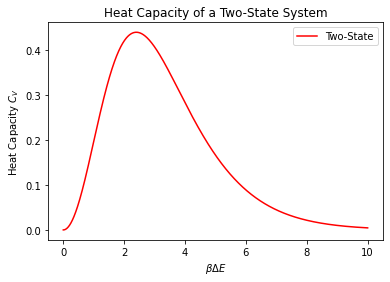

In [156]:
x = np.linspace(0, 10, 1000)
C_V = k_B * x**2 * np.exp(x) / (np.exp(x) + 1)**2

plt.plot(x, C_V, 'r', label='Two-state')
plt.legend(['Two-State'])
plt.xlabel('$\\beta \\Delta E$')
plt.ylabel('Heat Capacity $C_V$')
plt.title('Heat Capacity of a Two-State System')
plt.show()

## Problem 4
The characteristic vibrational frequency is given by $\epsilon = \hbar \omega$. We use the equation for the heat capacity given by
$$
    \begin{equation*}
        C_V = 3 N k_B \left( \beta \epsilon \right)^2 \frac{\mathrm{e}^{\beta \epsilon}}{\left( \mathrm{e}^{\beta \epsilon} - 1 \right)^2}.
    \end{equation*}
$$

Letting $a = \frac{\epsilon}{k_B}$ and $N = N_A$, we have
$$
    \begin{equation*}
        C_V = 3R \left( \frac{a}{T} \right)^2 \frac{\mathrm{e}^{\frac{a}{T}}}{\left( \mathrm{e}^{\frac{a}{T}} - 1 \right)^2}.
    \end{equation*}
$$

By fitting our curve to the data, we find that $a = \frac{\epsilon}{k_B} \approx 1300 \, \mathrm{K} \implies \omega = \frac{1300 k_B}{\hbar} = 1.7 \times 10^{14} \, \mathrm{Hz}$, which matches the experimental value. Thus, our theory of solids predicts the answer to a high degree of accuracy.


C:\Users\Razz\AppData\Local\Temp\ipykernel_7488\4100341802.py:7: RuntimeWarning: overflow encountered in exp
  C_p_theory = 3 * N * k_B * (a/T_theory)**2 * np.exp(a/T_theory) / (np.exp(a/T_theory) - 1)**2
C:\Users\Razz\AppData\Local\Temp\ipykernel_7488\4100341802.py:7: RuntimeWarning: overflow encountered in square
  C_p_theory = 3 * N * k_B * (a/T_theory)**2 * np.exp(a/T_theory) / (np.exp(a/T_theory) - 1)**2
C:\Users\Razz\AppData\Local\Temp\ipykernel_7488\4100341802.py:7: RuntimeWarning: invalid value encountered in true_divide
  C_p_theory = 3 * N * k_B * (a/T_theory)**2 * np.exp(a/T_theory) / (np.exp(a/T_theory) - 1)**2


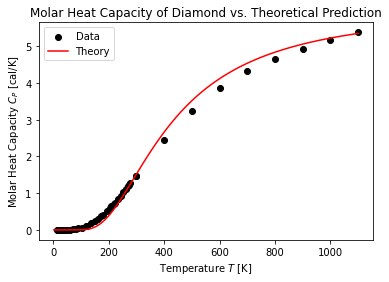

In [170]:
T = [12.833, 16.015, 21.304, 24.100, 31.332, 33.407, 41.319, 50.450, 60.540, 70.070, 80.868, 90.190, 103.085, 116.719, 120.283, 137.805, 151.444, 162.867, 173.316, 180.042, 192.641, 203.157, 210.341, 218.511, 222.107, 232.816, 243.176, 252.541, 263.168, 270.507, 274.134, 277.675, 298.15, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
C_p = [0.000115, 0.000192, 0.000424, 0.000600, 0.00135, 0.00161, 0.00313, 0.00579, 0.01035, 0.01681, 0.02762, 0.04058, 0.06462, 0.1009, 0.1124, 0.1794, 0.2448, 0.3083, 0.3728, 0.4175, 0.5072, 0.5881, 0.6465, 0.7146, 0.7449, 0.8404, 0.9341, 1.0220, 1.1232, 1.1967, 1.2332, 1.2686, 1.462, 1.480, 2.446, 3.242, 3.852, 4.312, 4.660, 4.932, 5.162, 5.380]

a = 1300
N = 2
T_theory = np.linspace(0.01, 1100, 1000)
C_p_theory = 3 * N * k_B * (a/T_theory)**2 * np.exp(a/T_theory) / (np.exp(a/T_theory) - 1)**2

plt.scatter(T, C_p, c='k', label='Data')
plt.plot(T_theory, C_p_theory, 'r', label='Theory')
plt.legend(['Data', 'Theory'])
plt.xlabel('Temperature $T$ [K]')
plt.ylabel('Molar Heat Capacity $C_P$ [cal/K]')
plt.title('Molar Heat Capacity of Diamond vs. Theoretical Prediction')
plt.show()